Here, we will learn about the finite difference (FD) equation

$$f'(x) = \frac{f(x+h) - f(x)}{h} + O(h)$$

The above equation is also the definition that is used in derivative, except that $\lim h\rightarrow 0$

The above equaito is asymmetric, now what if we use a more symmetric equation?
Let's expand $f(x+h)$ and $f(x - h)$

$$f(x+h) = f(x) + \frac{f'(x)}{1!}h + \frac{f''(x)}{2!}h^2 + R_2(x+h)$$
$$-f(x-h) = -f(x) + \frac{f'(x)}{1!}h - \frac{f''(x)}{2!}h^2 + R_2(x+h)$$

and it results in $f(x+h) - f(x-h) = 2f'(x)h + R_2(x+h) + R_2(x-h)$

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
f = lambda x: x**2 * np.sin(x**2) + 1
df = lambda x: 2*x*np.sin(x**2) + 2*x**3 * np.cos(x**2)
print(type(f))

<class 'function'>


In [36]:
x = np.linspace(-5,5,100)

In [37]:
def derivative(x, func, order = 1):
    dx = x[1]-x[0]

    if order == 1:
        return (func(x+dx)-func(x))/dx
    elif order == 2:
        return (func(x+(dx/2)) - func(x-(dx/2)))/dx

In [39]:
def rms(data1,data2):
    return np.sqrt(np.mean(np.power((data1-data2),2)))

In [42]:
print(rms(df(x),derivative(x,f, order = 1)))

print(rms(df(x),derivative(x,f, order = 2)))

29.732038188588533
2.460159415764929


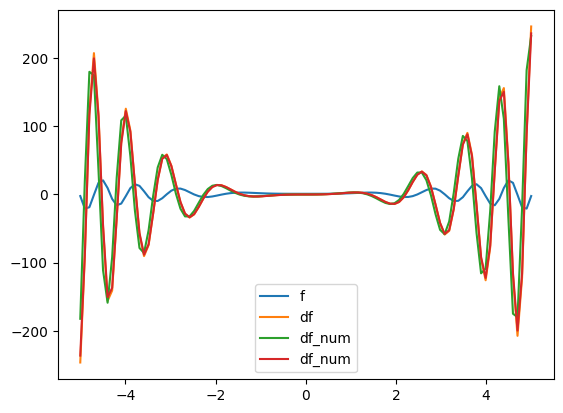

In [38]:
plt.plot(x,f(x), label = 'f')
plt.plot(x,df(x), label = 'df')
plt.plot(x,derivative(x,f, order = 1), label = 'df_num')
plt.plot(x,derivative(x,f, order = 2), label = 'df_num')
plt.legend()

In [87]:
stepsize = np.array(np.logspace(-6,-1,100))
rms_values = []
for h in stepsize:
    x = np.linspace(-5,5,int(1/h))
    rms_values.append(rms(df(x),derivative(x,f, order = 1)))

print(rms_values)

[0.003018907624802342, 0.003391212213523095, 0.0038094346392656365, 0.004279226669394097, 0.0048069584950444656, 0.0053997719579837134, 0.006065699037167728, 0.006813744484173869, 0.007654054213048178, 0.008597976657624198, 0.009658330366016992, 0.01084945506790314, 0.012187448879028433, 0.013690430208258235, 0.0153787974259426, 0.017275460433478416, 0.019405936321045213, 0.021799185338648663, 0.02448759079267567, 0.02750759479733589, 0.03090004352266216, 0.03471080872492716, 0.03899132006128355, 0.04379982173775885, 0.04920144780912055, 0.05526998981928152, 0.06208538290611237, 0.06974313439743503, 0.0783438215294731, 0.08800688688841596, 0.0988603846780893, 0.11105425169755617, 0.12474784515059253, 0.1401335358424189, 0.15741451012400692, 0.17683305697269544, 0.19863746111131605, 0.2231421367182961, 0.25065488006037534, 0.2815860702554159, 0.3163118719771857, 0.35532909232015986, 0.39916309210951817, 0.4483683022352576, 0.503730287309531, 0.5658567265575913, 0.6356777012657752, 0.714

Text(0, 0.5, 'rms values')

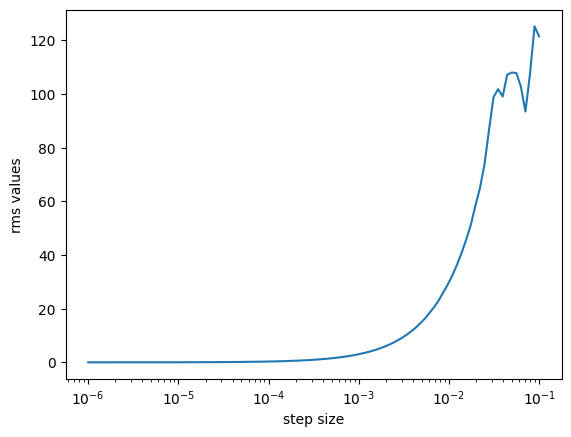

In [90]:
plt.plot(stepsize, rms_values)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('step size')
plt.ylabel('rms values')

In [3]:
import numpy as np
np.array((2**61)-1)


array(2305843009213693951, dtype=int64)